**Import Packages**

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

# sklearn packages
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_openml
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

from keras.datasets import mnist
import time


**Get MNIST fashion Data**

In [ ]:
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y = True)

**Subset into training and testing**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30) 
print("X_train: {0} \nX_test: {1} \ny_train: {2} \ny_test: {3}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train: (49000, 784) 
X_test: (21000, 784) 
y_train: (49000,) 
y_test: (21000,)


**Normalize inputs from RGB to 0-1**

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

**Create Random Forest model**

In [ ]:
# Build model
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
print("Random Forest Score: {}".format(forest.score(X_test, y_test)))

# Get prediction
rf_pred = forest.predict(X_test)

# Create confusion matrix
expected = y_test
predicted = rf_pred
print(sklearn.metrics.confusion_matrix(expected, predicted))

Random Forest Score: 0.8826666666666667
[[1839    0   34   68    7    0  173    0   12    0]
 [   0 2077    5   38    2    0   10    0    0    0]
 [  23    1 1748   27  211    1  102    0   17    0]
 [  50    6   15 1966   64    0   45    0    2    0]
 [   1    2  166   81 1748    0  113    0    4    0]
 [   0    0    0    1    0 1942    1   63    7   26]
 [ 316    1  238   49  174    0 1251    0   30    0]
 [   0    0    0    0    0   23    0 2017    3   69]
 [   6    1    5    8    8    8   23    7 2002    0]
 [   0    0    0    1    0   35    3   76    2 1946]]


**Create naive Bayes model**

In [ ]:
# Build model
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)

# Get prediction
gnb_pred = gnb_model.predict(X_test)
print("Naive Bayes Score: {}".format(accuracy_score(y_test, gnb_pred)))

# Create confusion matrix
expected = y_test
predicted = gnb_pred
print(sklearn.metrics.confusion_matrix(expected, predicted))

Naive Bayes Score: 0.6047619047619047
[[1275   57   70  461  185    0   40    0   45    0]
 [   5 1991   36   85    5    0   10    0    0    0]
 [   9   10  767  185 1081    0   34    0   44    0]
 [  17  380   17 1662   60    0    6    0    6    0]
 [   1   44  107  367 1573    0    4    0   19    0]
 [   1    1    7    2    0  545    9 1362   24   89]
 [ 209   37  280  486  869    0   70    0  108    0]
 [   0    0    0    0    0    9    0 2073    5   25]
 [   4    4   66  200  293    7   27    9 1458    0]
 [   2    0    3    3    1   37   10  705   16 1286]]


**Create Neural Network model**

In [ ]:
# Build Model
nn_model = MLPClassifier(solver='lbfgs', 
                         alpha=1e-5, 
                         hidden_layer_sizes=(15,), 
                         random_state=1)

# Get Prediction
nn_pred = nn_model.fit(X_train, y_train)
print("Neural Network Score: {}".format(nn_pred.score(X_train, y_train)))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Neural Network Score: 0.8763877551020408


**Display image mismatches**

In [ ]:
def display_mismatch(pred):
  '''
    Displays image mismatches
  '''
  misc_img = X_test[y_test != pred][:25]
  actual_label = y_test[y_test != pred][:25]
  predicted_label = pred[y_test != pred][:25]

  fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
  ax = ax.flatten()
  for i in range(25):
      img = misc_img[i].reshape(28, 28)
      ax[i].imshow(img, cmap='Greys', interpolation='nearest')
      ax[i].set_title('{0}: a={1}, p={2}'.format(i+1, actual_label[i], predicted_label[i]))

  ax[0].set_xticks([])
  ax[0].set_yticks([])
  plt.tight_layout()
  plt.show()

In [ ]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Display mismatches for Random Forest predictions**

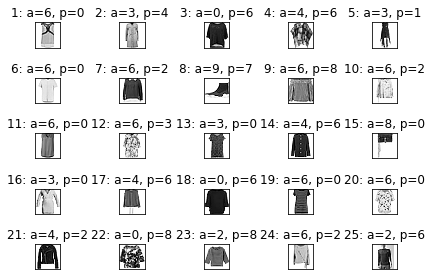

In [ ]:
display_mismatch(rf_pred)

**Display mismatches for naive Bayes predictions**

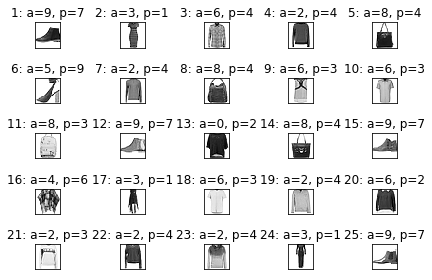

In [ ]:
display_mismatch(gnb_pred)